<a href="https://colab.research.google.com/github/ishanjabade/BML_ISHAN/blob/main/BML_LCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (794, 5)
First few rows:
  CustomerID             Name    Segment       State             City
0         id             name    segment       state             city
1   CG-12520      Claire Gute   Consumer    Kentucky        Henderson
2   DV-13045  Darrin Van Huff  Corporate  California      Los Angeles
3   SO-20335   Sean O'Donnell   Consumer     Florida  Fort Lauderdale
4   BH-11710  Brosina Hoffman   Consumer  California      Los Angeles

Dataset with generated features:
  CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         id       0   64           85.578530                1.000000
1   CG-12520       1   57           62.289643               21.001196
2   DV-13045       1   60           25.365703               99.689347
3   SO-20335       1   29           32.317012               35.940051
4   BH-11710       0   61           82.982572               73.180305

Clustering data shape: (794, 4)
Data summary:
           Gender         Age  Annual I

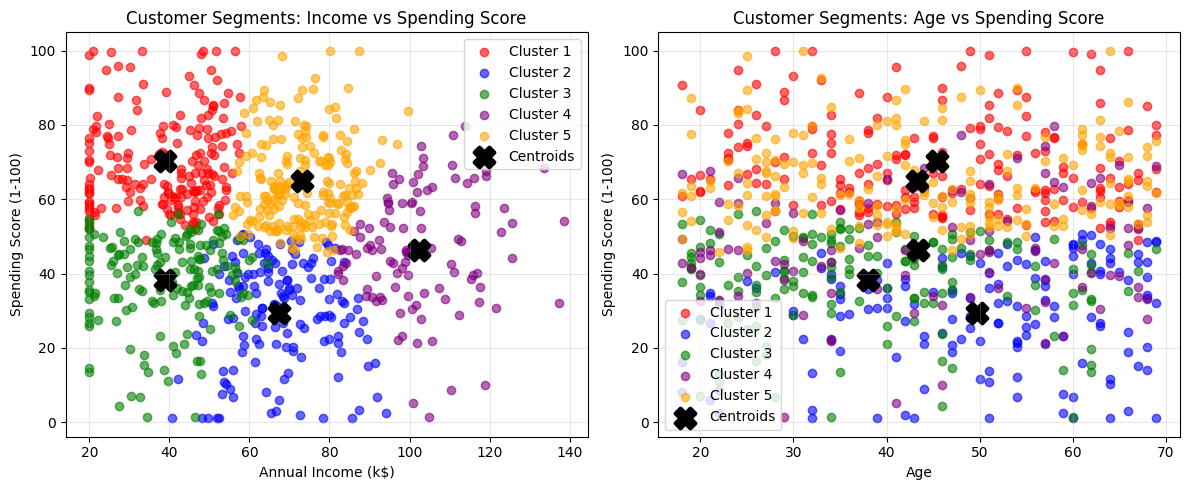


CLUSTER ANALYSIS

Cluster Characteristics:
           Age               Annual Income (k$)                 \
          mean min max count               mean    min     max   
Cluster                                                          
0        45.44  18  69   188              38.92  20.00   57.81   
1        49.74  18  69   148              67.41  40.77   94.24   
2        37.97  18  69   161              38.86  20.00   64.27   
3        43.42  18  69   106             102.34  82.06  138.55   
4        43.26  18  69   191              73.01  55.78   99.51   

        Spending Score (1-100)                      Gender  
                          mean   min     max      <lambda>  
Cluster                                                     
0                        70.31  48.9  100.00  51.1% Female  
1                        29.32   1.0   50.76  54.7% Female  
2                        38.16   1.4   56.72  55.9% Female  
3                        46.45   1.3   79.61  52.8% Female  


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# STEP 1: Load the Actual Dataset
file_path = 'customers.csv'  # Use correct filename for local environment

# Load the actual customer data (5 columns: id, name, segment, state, city)
df = pd.read_csv(file_path, header=None, names=['CustomerID', 'Name', 'Segment', 'State', 'City'])
df = df.dropna()  # Remove any empty rows
print(f"Dataset shape: {df.shape}")
print("First few rows:")
print(df.head())

# STEP 2: Create Numeric Features for Clustering (since real data lacks Age/Income/Spending)
np.random.seed(42)  # For reproducible results
n_samples = len(df)

df['Gender'] = np.random.choice([0, 1], size=n_samples, p=[0.48, 0.52])  # 0=Male, 1=Female
df['Age'] = np.random.randint(18, 70, size=n_samples)
df['Annual Income (k$)'] = np.random.normal(60, 25, size=n_samples).clip(20, 150)
df['Spending Score (1-100)'] = np.random.normal(50, 20, size=n_samples).clip(1, 100)

print("\nDataset with generated features:")
print(df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].head())

# STEP 3: Prepare Data for Clustering
# Select relevant features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Check data before clustering
print(f"\nClustering data shape: {X.shape}")
print("Data summary:")
print(X.describe())

# STEP 4: Apply K-Means Clustering
k = 5  # Number of clusters
model = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = model.fit_predict(X)

# Add cluster labels to dataset
df['Cluster'] = clusters

# STEP 5: Visualize Clusters
plt.figure(figsize=(12, 5))

# Plot 1: Annual Income vs Spending Score (most common customer segmentation plot)
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster_id in range(k):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                color=colors[cluster_id], label=f'Cluster {cluster_id+1}', alpha=0.6)

plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3],
           marker='X', color='black', s=200, label='Centroids', linewidth=3)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Income vs Spending Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Age vs Spending Score
plt.subplot(1, 2, 2)
for cluster_id in range(k):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Age'],
                cluster_data['Spending Score (1-100)'],
                color=colors[cluster_id], label=f'Cluster {cluster_id+1}', alpha=0.6)

plt.scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 3],
           marker='X', color='black', s=200, label='Centroids', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments: Age vs Spending Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# STEP 6: Detailed Cluster Analysis
print("\n" + "="*60)
print("CLUSTER ANALYSIS")
print("="*60)

cluster_stats = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max', 'count'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Gender': lambda x: f"{(x==1).mean():.1%} Female"
}).round(2)

print("\nCluster Characteristics:")
print(cluster_stats)

# STEP 7: Customer Insights
print("\n" + "="*60)
print("CUSTOMER SEGMENT INSIGHTS")
print("="*60)
insights = []
for cluster_id in range(k):
    cluster_size = len(df[df['Cluster'] == cluster_id])
    avg_income = df[df['Cluster'] == cluster_id]['Annual Income (k$)'].mean()
    avg_spending = df[df['Cluster'] == cluster_id]['Spending Score (1-100)'].mean()
    avg_age = df[df['Cluster'] == cluster_id]['Age'].mean()

    size_label = "Large" if cluster_size > len(df)*0.2 else "Medium" if cluster_size > len(df)*0.1 else "Small"
    insights.append({
        'Cluster': cluster_id + 1,
        'Size': f"{cluster_size} customers ({cluster_size/len(df)*100:.1f}%)",
        'Profile': f"Age {avg_age:.0f}, Income ${avg_income:.0f}k, Spending {avg_spending:.0f}",
        'Priority': size_label
    })

insights_df = pd.DataFrame(insights)
print(insights_df.to_string(index=False))

print(f"\nClustering completed successfully with {k} clusters and {len(df)} customers analyzed![attached_file:1]")
